<a href="https://colab.research.google.com/github/Tsukkei/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8: Create your own personal face recognition using SVM

In [40]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [41]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Display a single image from your drive

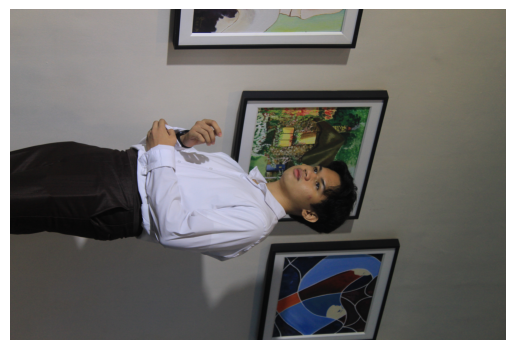

In [43]:
# Path to your image file in Google Drive
image_path = '/content/drive/My Drive/Train/Earl/3.JPG'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()

In [44]:
# put your answer here

def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder('/content/drive/My Drive/Train')

In [45]:
images.shape

(62, 10000)

In [46]:
labels.shape

(62,)

In [47]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Split your data

In [48]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)


## Train your SVM model

In [49]:
# put your answer here

from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC()

## Evaluate your model

In [50]:
# put your answer here

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.71%


## Test your model using images not in your training set

In [59]:
# put your answer here

def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

# Example usage
result = predict_image('/content/drive/My Drive/Test/64.jpg', model)
print(f'Predicted label:', result)

Predicted label: [0]


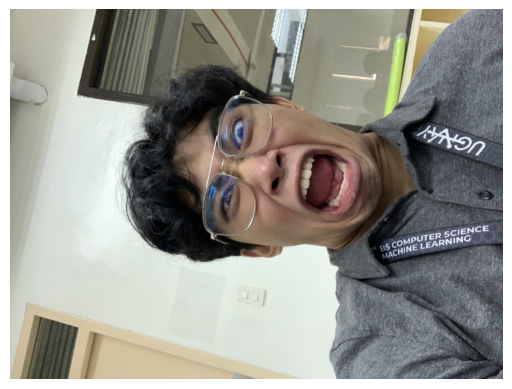

In [60]:
# Path to your image file in Google Drive
image_path = '/content/drive/My Drive/Test/64.jpg'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()

Predicted label: [1]


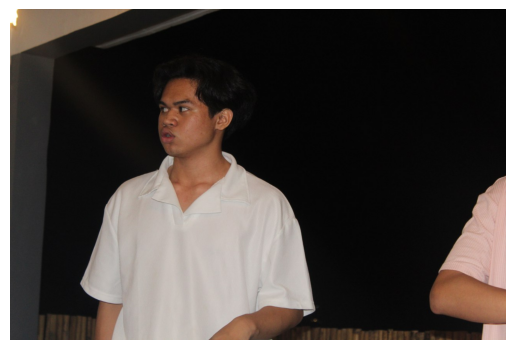

In [58]:
# Example usage
result = predict_image('/content/drive/My Drive/Test/71.jpg', model)
print(f'Predicted label:', result)

# Path to your image file in Google Drive
image_path = '/content/drive/My Drive/Test/71.jpg'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()